In [4]:
! pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 3.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.0 MB 3.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.0 MB 2.1 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.0 MB 2.2 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.0 MB 2.4 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.0 MB 2.4 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.0 MB 2.1 MB/s eta 0:00:03
   ----------------- ---------------------- 3.4/8.0 MB 2.0 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.0 MB 1.8 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.0 MB 1.9 MB/s eta 0:00:02
   ---------------------- -------

In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [28]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing x and y variable

In [29]:
x=df.drop(columns=['math_score'],axis=1)

In [30]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [31]:
print('Categories in each categorical feature:')
for col in x.select_dtypes(include=['object']).columns:
    print(f"{col}: {x[col].unique()}")


Categories in each categorical feature:
gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']


In [32]:
y=df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [33]:
# Create columns transformer with three different types of transformers
num_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = x.select_dtypes(include=['object']).columns.tolist()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_transformer = StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor= ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numerical_transformer, num_features)
    ]
)

In [34]:

x=preprocessor.fit_transform(x)
x.shape

(1000, 19)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 19), (800,), (200, 19), (200,))

In [39]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [44]:
models={
    'Linear Regression':LinearRegression(),
    'Ridge Regression':Ridge(),
    'Lasso Regression':Lasso(),
    'KNN Regressor':KNeighborsRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'SVR':SVR(),
    'XGB Regressor':XGBRegressor(),
    'CatBoost Regressor':CatBoostRegressor(verbose=False),
    'AdaBoost Regressor':AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance on Training Data:")
    print('MAE:',model_train_mae)
    print('MSE:',model_train_mse)
    print('RMSE:',model_train_rmse)
    print('R2 Square:',model_train_r2)
    print('---------------------------------------')
    print("\nModel Performance on Testing Data:")
    print('MAE:',model_test_mae)
    print('MSE:',model_test_mse)    
    print('RMSE:',model_test_rmse)
    print('R2 Square:',model_test_r2)
    r2_list.append(model_test_r2)
    print('---------------------------------------')

    print('='*35)
    print('\n')

Linear Regression
Model Performance on Training Data:
MAE: 4.266711846071957
MSE: 28.334870380648585
RMSE: 5.323050852720513
R2 Square: 0.8743172040139593
---------------------------------------

Model Performance on Testing Data:
MAE: 4.21476314247485
MSE: 29.095169866715484
RMSE: 5.393993869732842
R2 Square: 0.8804332983749565
---------------------------------------


Ridge Regression
Model Performance on Training Data:
MAE: 4.264987823725981
MSE: 28.33778823308244
RMSE: 5.323324922741654
R2 Square: 0.8743042615212909
---------------------------------------

Model Performance on Testing Data:
MAE: 4.21110068801426
MSE: 29.056272192348285
RMSE: 5.390387016935638
R2 Square: 0.8805931485028738
---------------------------------------


Lasso Regression
Model Performance on Training Data:
MAE: 5.206302661246528
MSE: 43.47840400585579
RMSE: 6.593815587795566
R2 Square: 0.8071462015863456
---------------------------------------

Model Performance on Testing Data:
MAE: 5.157881810347763
MSE:

In [45]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','R2_Score']).sort_values(by='R2_Score',ascending=False)

,Model,R2_Score
1,Ridge Regression,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852632
9,AdaBoost Regressor,0.852098
8,CatBoost Regressor,0.851632
7,XGB Regressor,0.827797
2,Lasso Regression,0.825320
3,KNN Regressor,0.783813
6,SVR,0.728600
4,Decision Tree Regressor,0.727334


Text(0, 0.5, 'Predicted Math Scores')

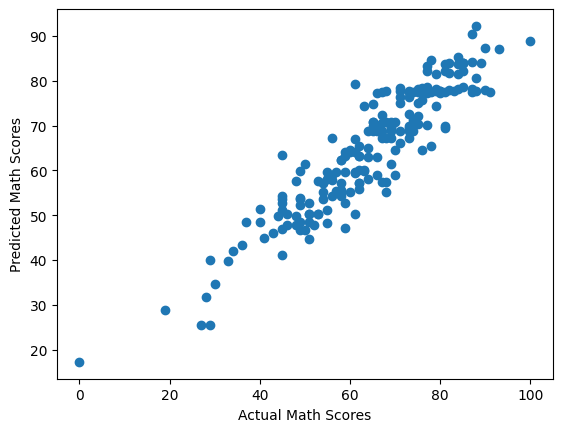

In [47]:
plt.scatter(x=y_test,y=y_test_pred)
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')

<Axes: xlabel='math_score'>

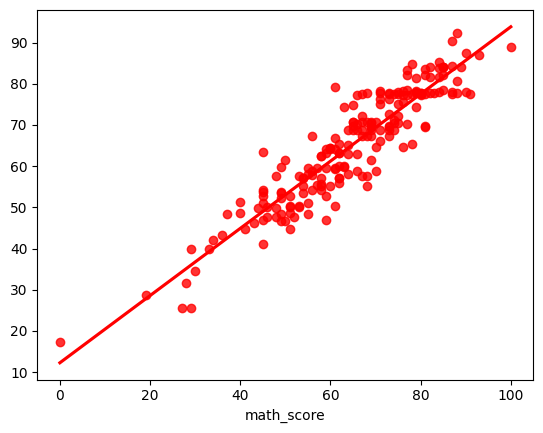

In [48]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color='red')

<Axes: xlabel='math_score'>

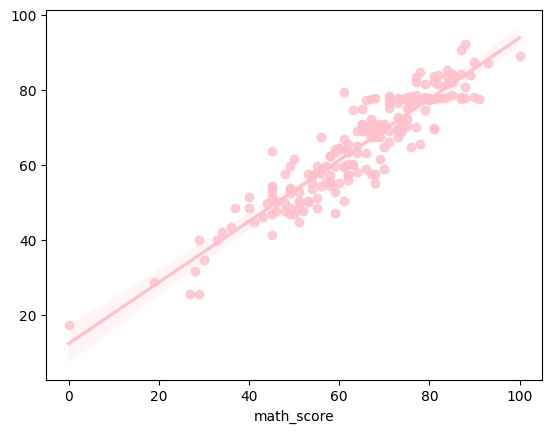

In [58]:
sns.regplot(x=y_test,y=y_test_pred,ci=100,color='pink')

In [59]:
pred_df=pd.DataFrame({'Actual Math Scores':y_test,'Predicted Math Scores':y_test_pred,'Difference':y_test - y_test_pred})

In [60]:
pred_df

,Actual Math Scores,Predicted Math Scores,Difference
521,91,77.440252,13.559748
737,53,57.627778,-4.627778
740,80,77.652174,2.347826
660,74,77.440252,-3.440252
411,84,83.746269,0.253731
...,...,...,...
408,52,47.702128,4.297872
332,62,55.944444,6.055556
208,74,68.865079,5.134921
613,65,68.865079,-3.865079
